In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [13]:
# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

In [14]:
# Normalize and reshape the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # Add channel dimension
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [15]:
# Build the autoencoder
latent_dim = 64  # Size of the latent space

In [16]:
# Encoder
input_img = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)

x = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)

x = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)


In [17]:
# Sparsity constraint using activity regularizer (L1 regularization)
encoded = layers.Flatten()(x)
encoded = layers.Dense(latent_dim, activation='relu', 
                       activity_regularizer=regularizers.l1(1e-5))(encoded)

In [18]:
# Decoder
x = layers.Dense(7 * 7 * 32, activation='relu')(encoded)
x = layers.Reshape((7, 7, 32))(x)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)

decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [19]:
# Compile the model
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [20]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - loss: 0.3526 - val_loss: 0.1684
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - loss: 0.1636 - val_loss: 0.1521
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - loss: 0.1514 - val_loss: 0.1453
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - loss: 0.1456 - val_loss: 0.1413
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.1416 - val_loss: 0.1399
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - loss: 0.1379 - val_loss: 0.1317
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - loss: 0.1329 - val_loss: 0.1293
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - loss: 0.1302 - val_loss: 0.1277
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - loss: 0.1284 - val_loss: 0.1270
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - loss: 0.1280 - val_loss: 0.1255
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - loss: 0.1257 - val_loss: 0.1245
Epoch 12/50
235/235 ━━━━━━━━━━

In [21]:

# Visualize some results
decoded_imgs = autoencoder.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


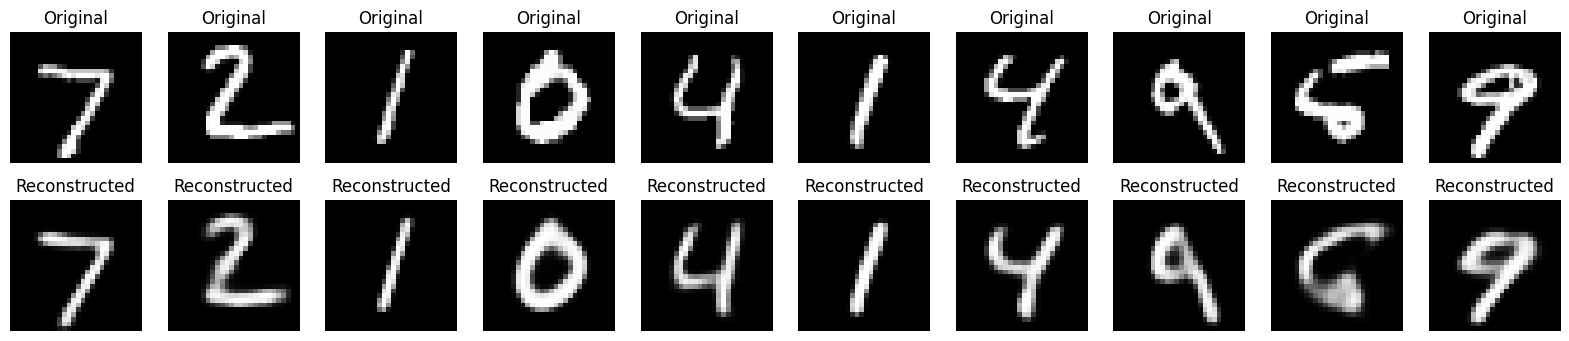

In [22]:
n = 10  # Display 10 digits
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()